In [1]:
#Seq2SEq and encoder-decoder Neural Network explained.
# in the blow image we are talking about the weights and biased obtained from the LSTM and Embeddings Layer.

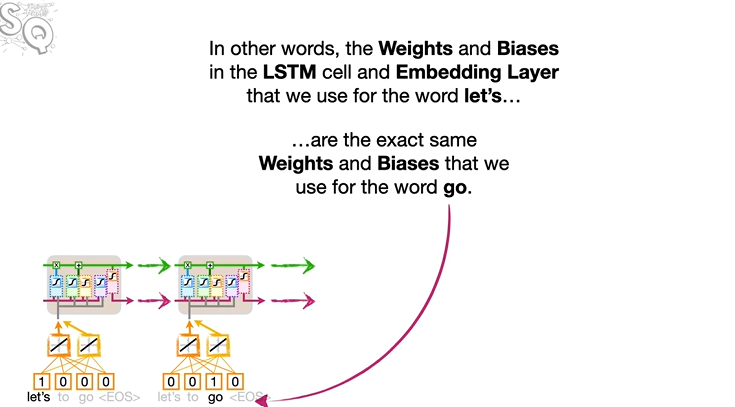

In [2]:
# Main problem that we encounter is to handle the input and output sentences, with different length.
# Embedding vectors are created in the backend by making use of activation functions, and one hot encoding the words based of various techniques like 
# cbow or skipgram method.
# basically it's a probability distribution such that p(X2|X1='The') and the output after trainig should be from this be cat, given 
# the complete sentence is the cat is good.

In [3]:
# We are trying to use in parallel another LSTm usint to get another set of weights and biases, to keep it availabel for practical use 
# Lets say we hvae two LSTM units and we will be sending the LETS value to both of them in parallel , this all is done so that we can multiple 
# weights and biasses in the network, and we recive the values as cell[long term memories] and hidden states[short term memories] which is known as the context vector.
# Below is how an encoder is created.

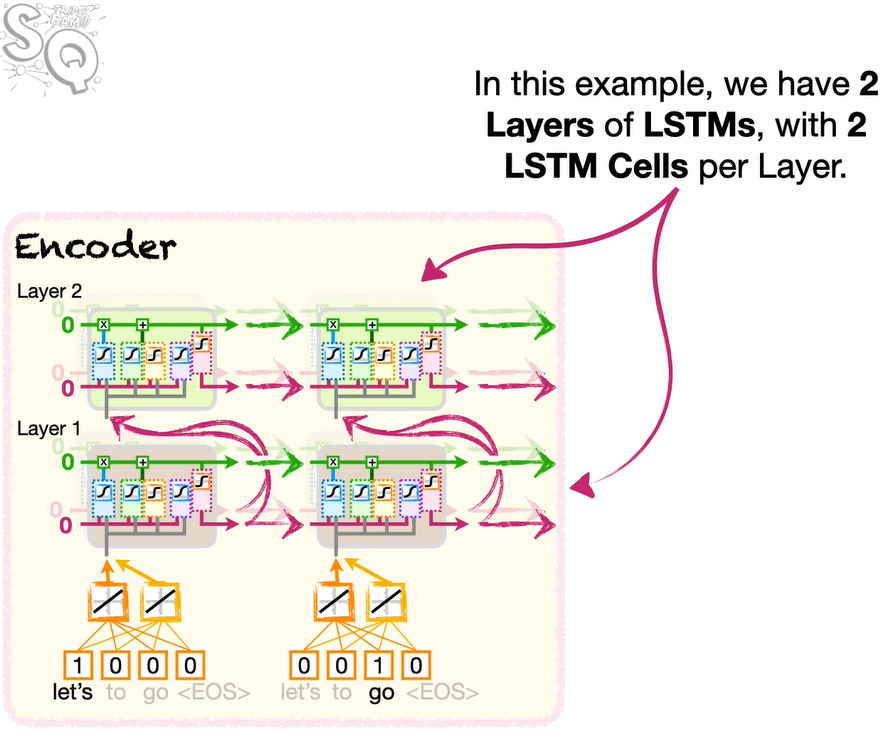

In [5]:
# Decoder: -
# Now we need to decode the Context vector. The decoder will have its own set of weights and biasses and have the same parallel architecture 
# The context vector is used as the initialized the input layer for the decoder and the goal of the decoder is to decode the context evctor
# into output sentences.
# the inputs in the LSTM first layers comes from an embedding layer, which have created the embedding values for the spanis words.
# ANd the output values from the top layer of the LSTM are transformed by addtitional layer of weights and biases in the fully connected layer
# fully connected layer is just another name for a basic neural network.
# The fully connected layer takes in 2 inouts for the two values that comes from the top layer and 4 outputs 1 for each of the words 
# in the spanish vocabulary[we are assumming that there are only 4 words in spaniesh vocabulary.]
# the we run the output through the softmax to get the output, but the decoder only stops when it produces an <EOS> token as an output.
# so the output from the final LSTM decoder layer again goes to the decoder as an input and this process continues till we have the <eos> token as an output.
# we can have different lengths of the input and the output sentence.
# During training the correct words will be used even if we have the output as the wrong predicted output, alongside this we will stop 
# at the known phrase length, rather than using the predicted tokens for everything, is called Teacher Forcing. 

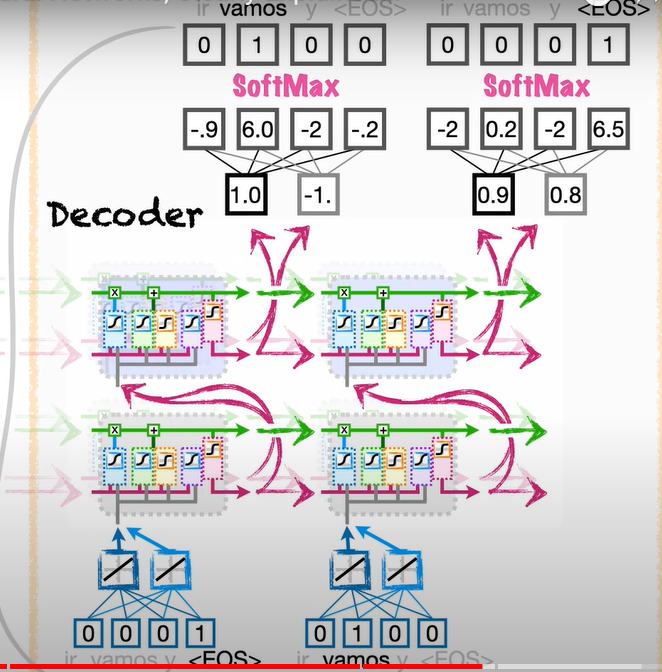

# Attention for Neural networks Explained

In [6]:
# even with the given neural network we can still forget some of the parts of the senteces that are given to us.
# Like in a longer sentence the first words may be forgotten till the encoder gets to the end.
# The main IDea is to provide the decoder an access to each word in the given sentence.
# We calculate the similarity scores based of each input in the LSTM layer with each output from the Decoder for each word.
# We make use of cosine similarity to calculate the square.

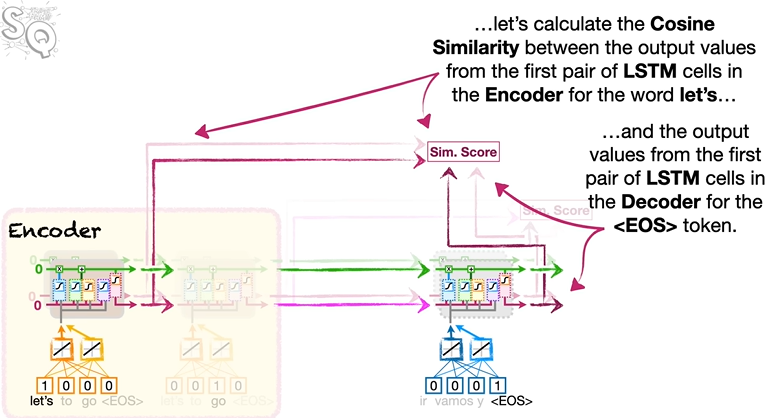

In [7]:
# Look at the Attention model given in the Transformers model explanation with the code to have a good knowledge.

# MACHINE NEURAL LANGUAGE TRANSLATION

In [66]:
from datasets import load_dataset 
import numpy as np

In [2]:
data = load_dataset('kde4',lang1='en',lang2='fr') 

Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

Dataset kde4 downloaded and prepared to C:/Users/karan/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
data 

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [46]:
small_data=data['train'].shuffle().select(range(1500))

In [47]:
small_data=small_data.train_test_split(0.3)

In [48]:
small_data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 1050
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 450
    })
})

In [16]:
data['train']['translation'][:5]

[{'en': 'Lauri Watts', 'fr': 'Lauri Watts'},
 {'en': '& Lauri. Watts. mail;', 'fr': '& Lauri. Watts. mail;'},
 {'en': 'ROLES_OF_TRANSLATORS', 'fr': '& traducteurJeromeBlanc;'},
 {'en': '2006-02-26 3.5.1', 'fr': '2006-02-26 3.5.1'},
 {'en': 'The Babel & konqueror; plugin gives you quick access to the Babelfish translation service.',
  'fr': 'Le module externe Babel pour & konqueror; vous donne un accès rapide au service de traduction Babelfish.'}]

In [17]:
checkpoint='Helsinki-NLP/opus-mt-en-fr' # choosing this is important because this will tell su what tokenizer do we get from 
# the hugging facte and using the above checkpoint we know that the tokenizer will have vocabulary for both en-fr

In [18]:
from transformers import AutoTokenizer

In [19]:
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [49]:
def tokenize_fn(batch): # need to tokenize the french and englissentences seprately
    inputs= [x['en'] for x in batch['translation']]
    targets= [x['fr'] for x in batch['translation']]
    tokenized_inputs= tokenizer(inputs,truncation=True,max_length=200)
    tokenized_targets = tokenizer(text_target=targets,truncation=True,max_length=200)
    # becuase there are sentences in the ytraining set that we need to limit to the max_lengh of 200.
    tokenized_inputs['labels']=tokenized_targets['input_ids']
    return tokenized_inputs
# all the steps are similar to preprocessing of the previous tokenizer functions.

In [50]:
tokenized_dataset = small_data.map(tokenize_fn,batched=True,remove_columns=small_data['train'].column_names)

Map:   0%|          | 0/1050 [00:00<?, ? examples/s]

Map:   0%|          | 0/450 [00:00<?, ? examples/s]

In [51]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1050
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 450
    })
})

In [35]:
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [52]:
from transformers import DataCollatorForSeq2Seq
data_collator= DataCollatorForSeq2Seq(model=model,tokenizer=tokenizer)
# we need to pass in the model to this data collator in order to fill up the decoder input Ids column and the input ids are just 
# the sifted version of the target values. as the decoder takes the input from its own previous predicted target value.
# so basically durinhg training we give the decoder the ground truth just shifted by one but when we are predicting from the given 
# sentence we take teh input id from the previous predicted word.
# data collator help us to pad the data and then convert the data to the torch tensors.

In [53]:
data_collator([tokenized_dataset['train'][i] for i in range(3)])

{'input_ids': tensor([[13247,    73,  2103,  1437,   301,  4494,  4898,  5730,   110,     0,
         59513],
        [31323,    67,  1437,    18,     4,  4452,  7601,    75,  1437, 17706,
             0],
        [ 5800, 11371,   222,     0, 59513, 59513, 59513, 59513, 59513, 59513,
         59513]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]), 'labels': tensor([[34688,     5,  4965,    19,  2428,   301,  4494,   104,   439, 30028,
           110,     0],
        [   89, 23772,    66,  2428,    31,    19,   369,     5,  4027, 31640,
           597,     0],
        [12624, 41428,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100]]), 'decoder_input_ids': tensor([[59513, 34688,     5,  4965,    19,  2428,   301,  4494,   104,   439,
         30028,   110],
        [59513,    89, 23772,    66,  2428,    31,    19,   369,     5,  4027,
         31640,   597],

In [56]:
# we can see above that the decoder input ids and the labels match and are just shifted by one, they are same as the model is 
# trying to learn to predict teh next value in another language but needs the input as well.

In [61]:
import evaluate

In [62]:
# Why we need this is because there is probelm that the slightly different sentence will ahve the same meaning, so bert takes in
# the contextual embeddings and then making use of pairwise Cosine Similarity calcuales teh similarity matrix to get us the result
# it is better score as it takes into account of the context rather than the word itself.
bleu_metric= evaluate.load('sacrebleu')
bert_metric = evaluate.load('bertscore')
# Bleu score  looks at the n-grams, with subsiuquent size of n as the meaning iof some words may be depicted in the next 3-4 
# words later.

In [93]:
# blue metric won't be effective in calculation for small sentences.
def compute_metrics(preds_and_labels):
    # we are getting predictions directly instead of logist as beofre because it we need to get the tokens rather than a predicted valeu for a token
    # machine translation model make use of beam search in order to find the most likely sequence of predicted words altogether 
    # therefore much easier for us to find the output from token ids rather than making use of logits.
    preds,labels=preds_and_labels
    # converting predcitions into words
    decoder_preds = tokenizer.batch_decode(preds,skip_special_tokens=True)# becaseu the belu metric and bert score takes input as strings 
    # and not number.
    labels = np.where(labels!=-100,labels,tokenizer.pad_token_id)
    decoded_labels=tokenizer.batch_decode(labels,skip_special_tokens=True) 
    # given this we may get extra whute spaces in our program.
    decoder_preds =[pred.strip() for pred in decoder_preds]
    decoded_labels=[[label.strip()] for label in decoded_labels]
    bleu = bleu_metric.compute(predictions=decoder_preds,references=decoded_labels)
    bert = bert_metric.compute(predictions=decoder_preds,references=decoded_labels,lang='fr')
    return {"bleu":bleu['score'],'bert_score':np.mean(bert['f1'])}

In [94]:
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer

In [95]:
training_args= Seq2SeqTrainingArguments(
    'seq2seq',
    evaluation_strategy='no',# because this is big process as of now, we can also evaluate the model once beofre training and 
    # once after trainng so as to see whther our metrics have changed or not.
    save_strategy='epoch',
    num_train_epochs=2,
    predict_with_generate=True,# It allwos for model to be evaluated at the time of training
    learning_rate=2e-5,
    weight_decay=0.01,
    # this is just a memeory optimizing step to reduce the space for the weights that we might be using.
)

In [96]:
trainer = Seq2SeqTrainer(
    model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [97]:
trainer.train()

C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=264, training_loss=1.4544781771573154, metrics={'train_runtime': 246.0126, 'train_samples_per_second': 8.536, 'train_steps_per_second': 1.073, 'total_flos': 21692834906112.0, 'train_loss': 1.4544781771573154, 'epoch': 2.0})

In [99]:
from transformers import pipeline

In [101]:
pipe= pipeline('translation',model='seq2seq/checkpoint-264/')

In [102]:
pipe('You have seen in the above steps, how to translate from one sentence to another')

[{'translation_text': "Vous avez vu dans les étapes ci-dessus, comment traduire d'une phrase à une autre"}]

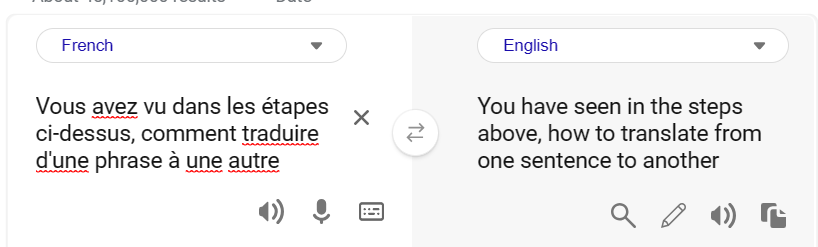